# 📦 **1. Import Library**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 📊 **2. Load and Data Understanding**

In [18]:
# Load data
df = pd.read_csv('train.csv')
print("📂 Dataset shape:", df.shape)

# Tampilkan sampel data
df.head()

📂 Dataset shape: (913000, 4)


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [19]:
# Cek tipe data
print("\n🔧 Data types:")
print(df.dtypes)


🔧 Data types:
date     object
store     int64
item      int64
sales     int64
dtype: object


In [20]:
# Cek missing value
print("\n🚫 Missing values:")
print(df.isnull().sum())

# Ubah kolom 'date' jadi datetime
df['date'] = pd.to_datetime(df['date'])


🚫 Missing values:
date     0
store    0
item     0
sales    0
dtype: int64


# 🔍 **3. Exploratory Data Analysis (EDA)**


📊 Descriptive statistics:
count     1826.000000
mean     26125.143483
std       6418.270181
min      11709.000000
25%      21195.000000
50%      25839.500000
75%      30779.500000
max      44936.000000
Name: sales, dtype: float64


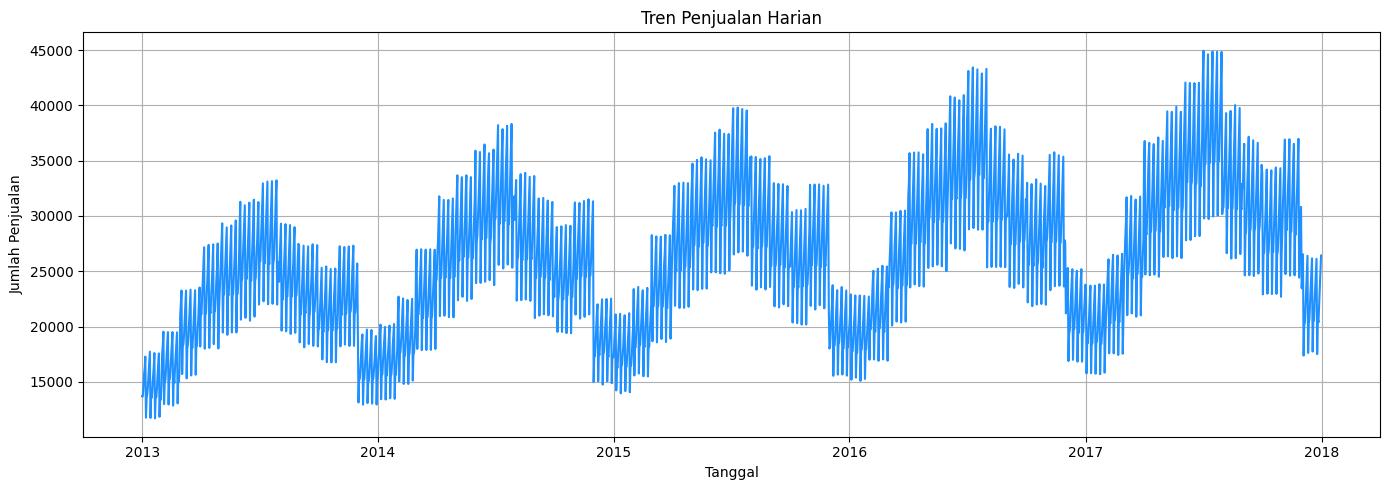

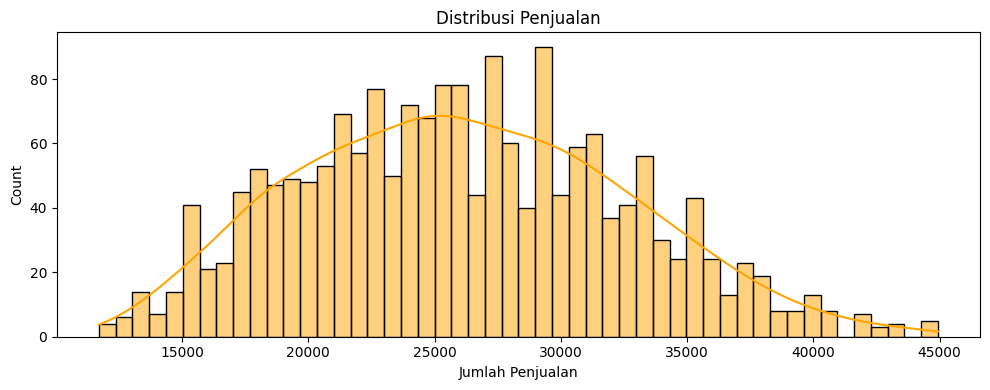

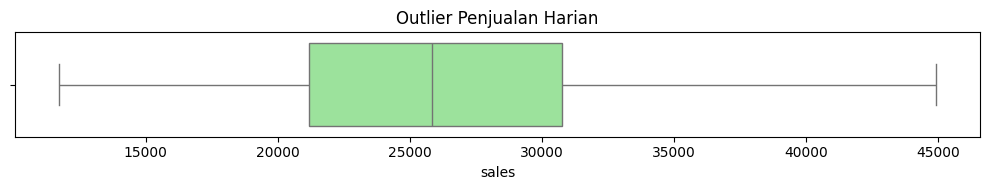

In [21]:
# Agregasi penjualan harian
daily_sales = df.groupby('date')['sales'].sum().reset_index()

# Statistik deskriptif
print("\n📊 Descriptive statistics:")
print(daily_sales['sales'].describe())

# Visualisasi tren harian
plt.figure(figsize=(14,5))
plt.plot(daily_sales['date'], daily_sales['sales'], color='dodgerblue')
plt.title("Tren Penjualan Harian")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penjualan")
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualisasi distribusi penjualan
plt.figure(figsize=(10,4))
sns.histplot(daily_sales['sales'], bins=50, kde=True, color='orange')
plt.title("Distribusi Penjualan")
plt.xlabel("Jumlah Penjualan")
plt.tight_layout()
plt.show()

# Boxplot untuk melihat outlier
plt.figure(figsize=(10,2))
sns.boxplot(x=daily_sales['sales'], color='lightgreen')
plt.title("Outlier Penjualan Harian")
plt.tight_layout()
plt.show()

# 🔃 **4. Data Preparation for Prophet**

In [22]:
df_prophet = daily_sales.rename(columns={'date': 'ds', 'sales': 'y'})

# Split data
train_prophet = df_prophet[df_prophet['ds'] <= '2014-12-31']
test_prophet = df_prophet[df_prophet['ds'] > '2014-12-31']

print("\n📅 Jumlah data train:", len(train_prophet))
print("📅 Jumlah data test :", len(test_prophet))


📅 Jumlah data train: 730
📅 Jumlah data test : 1096


# 🤖 **5. Modeling**

In [23]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

print("\n🚀 Training Prophet model...")
model.fit(train_prophet)


🚀 Training Prophet model...


19:29:37 - cmdstanpy - INFO - Chain [1] start processing
19:29:38 - cmdstanpy - INFO - Chain [1] done processing


# 📅 **6. Forecasting**

In [24]:
future = model.make_future_dataframe(periods=len(test_prophet), freq='D')
forecast = model.predict(future)

# Filter prediksi untuk test set
forecast_test = forecast[forecast['ds'].isin(test_prophet['ds'])]

# 🧪 **7. Evaluasi Model**

In [25]:
rmse = mean_squared_error(test_prophet['y'], forecast_test['yhat'], squared=False)
mae = mean_absolute_error(test_prophet['y'], forecast_test['yhat'])

print(f"\n📈 Prophet - RMSE: {rmse:.2f}, MAE: {mae:.2f}")


📈 Prophet - RMSE: 1631.66, MAE: 1301.87


e:\Software\Python\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# 📉 **8. Visualisasi Prediksi**

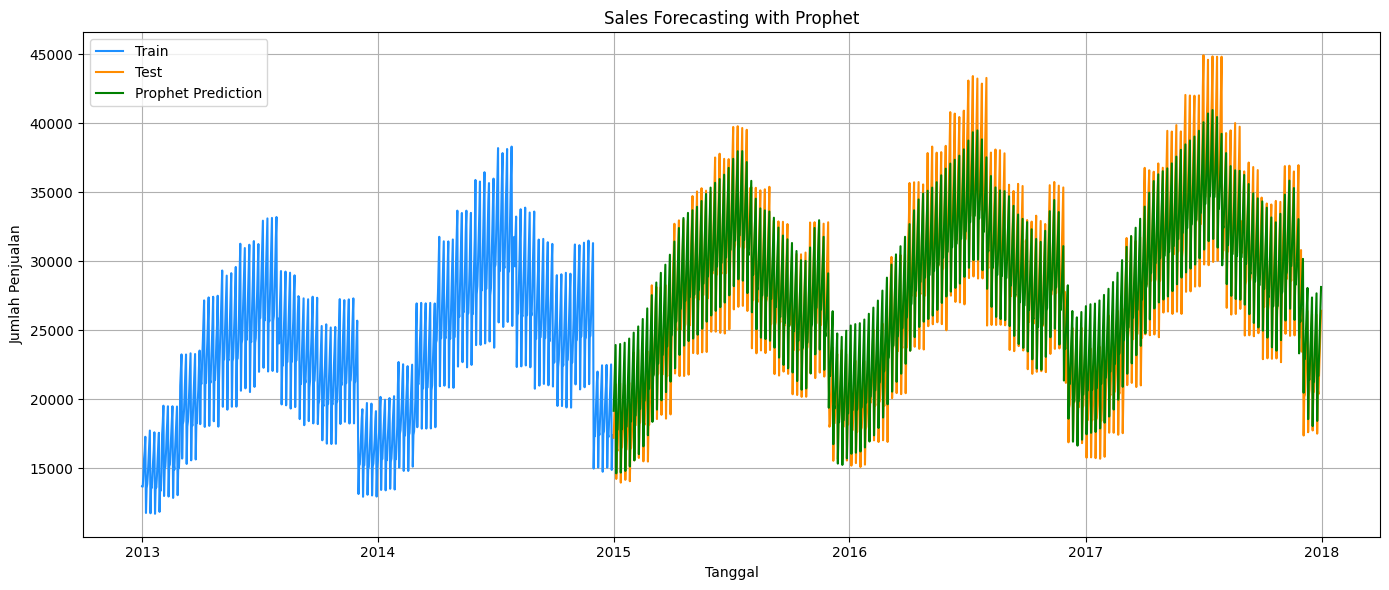

In [26]:
plt.figure(figsize=(14,6))
plt.plot(train_prophet['ds'], train_prophet['y'], label='Train', color='dodgerblue')
plt.plot(test_prophet['ds'], test_prophet['y'], label='Test', color='darkorange')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Prophet Prediction', color='green')
plt.title("Sales Forecasting with Prophet")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penjualan")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📉 **9. Visualisasi Komponen Prophet**


🧩 Menampilkan komponen tren & musiman...


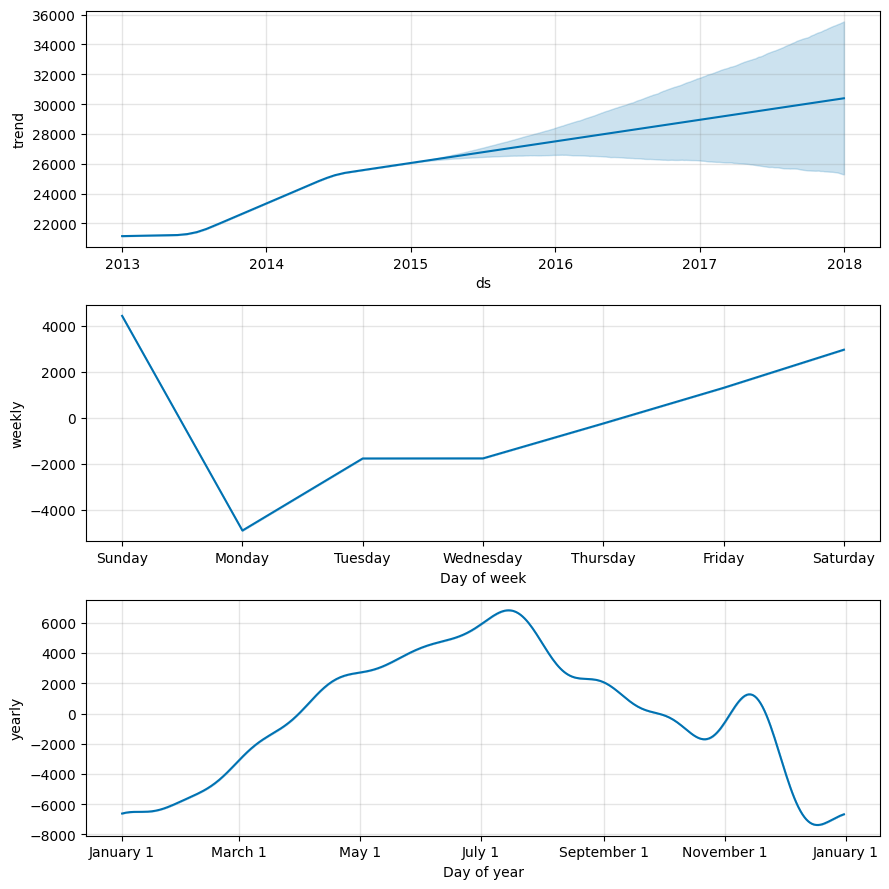

In [27]:
print("\n🧩 Menampilkan komponen tren & musiman...")
model.plot_components(forecast)
plt.tight_layout()
plt.show()